# Test the Teal Scorpions Machine Learning Package

In [1]:
import TSML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size="5">With the mice data, using just t-SC-m as positive and others as not t-SC-m , run logistic regression</font>

In [3]:
prot_list=list(pd.read_excel("Proteins.xls"))
data=np.array(pd.read_excel("Proteins.xls"))

np.random.shuffle(data)

data[:,77]=np.where(data[:,77]=='t-SC-m','t-SC-m', 'not t-SC-m')

X_train=data[:int(data.shape[0]*70/100),:77].astype(float)
X_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),:77].astype(float)
X_test=data[int(data.shape[0]*85/100):,:77].astype(float)

y_train=data[:int(data.shape[0]*70/100),77:]
y_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),77:]
y_test=data[int(data.shape[0]*85/100):,77:]

X_train.shape[0]+X_test.shape[0]+X_val.shape[0]

X_train=np.where(np.isnan(X_train), np.ma.array(X_train, mask=np.isnan(X_train)).mean(axis=0), X_train) 
X_val=np.where(np.isnan(X_val), np.ma.array(X_train, mask=np.isnan(X_train)).mean(axis=0), X_val) 
X_test=np.where(np.isnan(X_test), np.ma.array(X_train, mask=np.isnan(X_train)).mean(axis=0), X_test)

t-SC-m
0.203438126808971


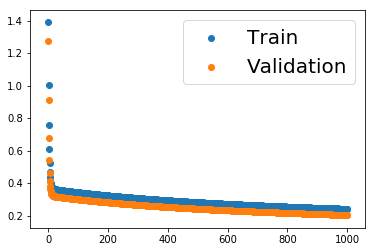

In [4]:
model=TSML.LogisticRegression(X_train.shape[1],1)
model.train(X_train,y_train,1000,.0001,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.positive_class)
print(model.valerror[-1])

In [5]:
model.predict(X_test)
(y_test==model.predictions).mean()

0.845679012345679

<font size="5">Now try a single layer neural net, which is the same as logistic regression</font>

In [6]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def cost(y,p):
    Err=[]
    zeros=np.where(y==0)
    ones=np.where(y==1)
    Err=np.hstack((-y[ones]*np.log(p[ones]),-(1-y[zeros])*np.log(1-p[zeros])))
    return np.mean(Err)

def dertanh(X):
    return 1-np.power(np.tanh(X),2)

t-SC-m
0.23572616163482518


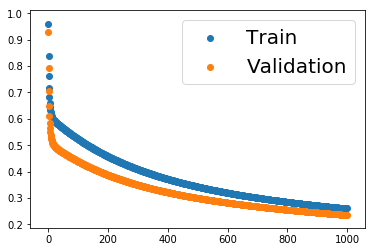

In [7]:
nodes=[1]
activations=[np.tanh]*(len(nodes)-1)+[sigmoid]
act_ders=[dertanh]*(len(nodes)-1)

model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,cost,task="Classification")
model.train(X_train,y_train,1000,.0001,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.positive_class)
print(model.valerror[-1])

In [8]:
model.predict(X_test)
(y_test==model.predictions).mean()

0.8518518518518519

<font size="5">Adding an input layer actually makes the fit worse</font>

t-SC-m
0.20602795448361413


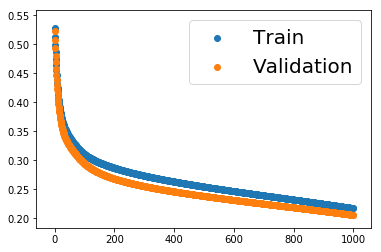

In [9]:
nodes=[3,1]
activations=[np.tanh]*(len(nodes)-1)+[sigmoid]
act_ders=[dertanh]*(len(nodes)-1)

model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,cost,task="Classification")
model.train(X_train,y_train,1000,.0001,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.positive_class)
print(model.valerror[-1])

In [10]:
model.predict(X_test)
(y_test==model.predictions).mean()

0.8271604938271605

<font size="5">Try logistic for all mice</font>

In [11]:
prot_list=list(pd.read_excel("Proteins.xls"))
data=np.array(pd.read_excel("Proteins.xls"))

np.random.shuffle(data)

X_train=data[:int(data.shape[0]*70/100),:77].astype(float)
X_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),:77].astype(float)
X_test=data[int(data.shape[0]*85/100):,:77].astype(float)

y_train=data[:int(data.shape[0]*70/100),77:]
y_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),77:]
y_test=data[int(data.shape[0]*85/100):,77:]

X_train.shape[0]+X_test.shape[0]+X_val.shape[0]

X_train=np.where(np.isnan(X_train), np.ma.array(X_train, mask=np.isnan(X_train)).mean(axis=0), X_train) 
X_val=np.where(np.isnan(X_val), np.ma.array(X_train, mask=np.isnan(X_train)).mean(axis=0), X_val) 
X_test=np.where(np.isnan(X_test), np.ma.array(X_train, mask=np.isnan(X_train)).mean(axis=0), X_test)

In [12]:
len(np.unique(y_train))

8

In [13]:
model=TSML.LogisticRegression(X_train.shape[1],len(np.unique(y_train)))
model.train(X_train,y_train,1000,.0001,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.y_classes)
print(model.valerror[-1])

AttributeError: 'LogisticRegression' object has no attribute 'y_classes'

In [ ]:
model.predict(X_test)

(y_test==model.y_classes[model.predictions.argmax(1)]).mean()

<font size="5">Once again, a neural net with just an output layer</font>

In [20]:
def softmax(X):
    p=np.exp(X)
    return(p/(p.sum(1).reshape(X.shape[0],1)))

def cost(y,p):
    return -1*np.sum(np.multiply(y,np.log(p)))/y.shape[0]

def dertanh(X):
    return 1-np.power(np.tanh(X),2)

In [21]:
nodes=[len(np.unique(y_train))]
activations=[np.tanh]*(len(nodes)-1)+[softmax]
act_ders=[dertanh]*(len(nodes)-1)

model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,cost,task="Classification")
model.train(X_train,y_train,1000,.0001,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.y_classes)
print(model.valerror[-1])

NameError: name 'y_classes' is not defined

In [15]:
model.predict(X_test)

(y_test==model.y_classes[model.predictions.argmax(1)]).mean()

0.12319006249047401

<font size="5">Adding an input layer still makes the fit worse</font>

['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']
1.7600512534507557


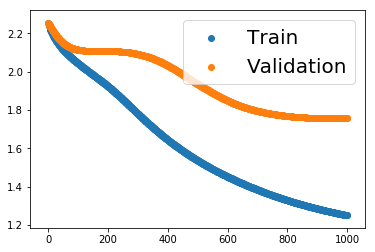

In [16]:
nodes=[3,len(np.unique(y_train))]
activations=[np.tanh]*(len(nodes)-1)+[softmax]
act_ders=[dertanh]*(len(nodes)-1)

model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,cost,task="Classification")

model.train(X_train,y_train,1000,.0001,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.y_classes)
print(model.valerror[-1])

In [17]:
model.predict(X_test)
(y_test==model.y_classes[model.predictions.argmax(1)]).mean()

0.10966316110349032

<font size="5">Now try the linear regression module on generated data</font>

In [18]:
N = 2000
X = np.hstack((np.random.randn(N,1)*3,np.random.randn(N,1)*1+5))

w_true = np.array([[7.],[9.]])
# generate true y with some noise
y = X.dot(w_true) + np.random.randn(N,1)+3.
data=np.hstack((X,y))

np.random.shuffle(data)

X_train=data[:int(data.shape[0]*70/100),:-1]
X_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),:-1]
X_test=data[int(data.shape[0]*85/100):,:-1]

y_train=data[:int(data.shape[0]*70/100),-1:]
y_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),-1:]
y_test=data[int(data.shape[0]*85/100):,-1:]

X_train.shape[0]+X_test.shape[0]+X_val.shape[0]

2000

In [19]:
y.shape

(2000, 1)

<font size="5">Closed form solution first</font>

In [20]:
model=TSML.LinearRegression(X_train.shape[1],y_train.shape[1], solver="Closed Form")
model.weightinit()
model.train(X_train,y_train,0,0,X_val,y_val,lam1=0,lam2=0.001)

print(model.error, model.valerror)

[array([[0.97911128]])] [array([[0.84072173]])]


<font size="5">Now gradient descent</font>

[[0.08071486]] [[0.08325696]]


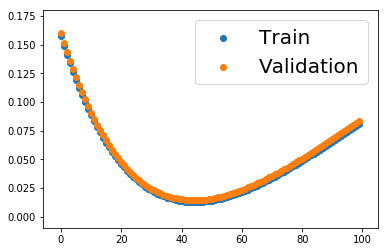

In [21]:
model=TSML.LinearRegression(X_train.shape[1],y_train.shape[1], solver="Gradient Descent")
model.weightinit()
model.train(X_train,y_train,100,1e-6,X_val,y_val,lam1=0.01,lam2=0.001)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.error[-1], model.valerror[-1])

<font size="5">Now a single layer NN with regression</font>

In [22]:
nodes=[1]
activations=[np.tanh]*(len(nodes)-1)
act_ders=[dertanh]*(len(nodes)-1)

In [23]:
def cost(y,y_hat):
    return ((y_hat-y).T@(y_hat-y))/len(y)

def frob_cost(y,y_hat):
    return np.trace((y_hat-y).T@(y_hat-y))/len(y)

[[0.46505047]] [[0.06504301]]


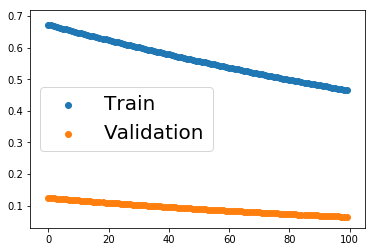

In [24]:
model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,cost,task="Regression")

model.train(X_train,y_train,100,1e-6,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)
print(model.error[-1], model.valerror[-1])

<font size="5">Now a deep NN with regression</font>

In [25]:
nodes=[8,8,1]
activations=[np.tanh]*(len(nodes)-1)
act_ders=[dertanh]*(len(nodes)-1)

In [26]:
model.Xmaxes

array([9.8895516 , 8.48859269])

[[0.08286523]] [[0.19089742]]


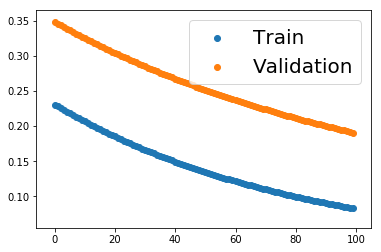

In [27]:
model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,cost,task="Regression")

model.train(X_train,y_train,100,1e-6,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)
print(model.error[-1], model.valerror[-1])

<font size="5">Now regression with multiple y columns</font>

In [51]:
N = 2000
X = np.hstack((np.random.randn(N,1)*3,np.random.randn(N,1)*1+5))

w_true = np.array([[7.,9.,2.],[8.,9.,10.]])
# generate true y with some noise
y = X.dot(w_true) + np.random.randn(N,1)+3.
data=np.hstack((X,y))
np.random.shuffle(data)

X_train=data[:int(data.shape[0]*70/100),:-3]
X_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),:-3]
X_test=data[int(data.shape[0]*85/100):,:-3]

y_train=data[:int(data.shape[0]*70/100),-3:]
y_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),-3:]
y_test=data[int(data.shape[0]*85/100):,-3:]

X_train.shape[0]+X_test.shape[0]+X_val.shape[0]

2000

<font size="5">Closed Form first</font>

In [55]:
model=TSML.LinearRegression(X_train.shape[1],y_train.shape[1], solver="Closed Form")
model.weightinit()
model.train(X_train,y_train,0,0,X_val,y_val,lam1=0,lam2=0.001)

print(model.error, model.valerror)

[3.0771015868877125] [3.0580345654910364]


In [57]:
model.predict(X_test)
frob_cost(y_test,model.normpredictions)

2.6060465346463477

<font size="5">Now Gradient Descent</font>

0.6168997506621408 0.6157332565989221


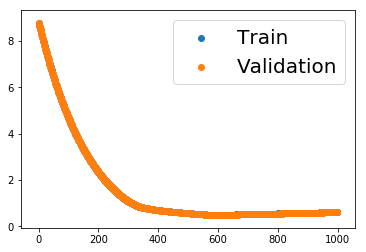

In [59]:
model=TSML.LinearRegression(X_train.shape[1],y_train.shape[1], solver="Gradient Descent")

model.weightinit()
model.train(X_train,y_train,1000,1e-6,X_val,y_val,lam1=0,lam2=0.001)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.error[-1], model.valerror[-1])

In [61]:
model.predict(X_test)
y_test_norm=(y_test-model.ymins)/(model.ymaxes-model.ymins)
frob_cost(y_test_norm,model.normpredictions)

0.6379113470125767

<font size="5">Now a single layer NN</font>

In [65]:
nodes=[3]
activations=[np.tanh]*(len(nodes)-1)
act_ders=[dertanh]*(len(nodes)-1)

1.2302051838257744 0.9664530856918242


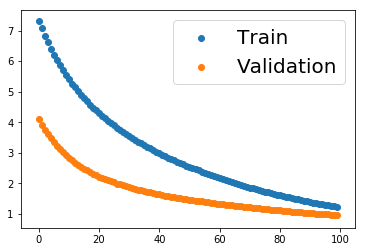

In [66]:
model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,frob_cost,task="Regression")
model.train(X_train,y_train,100,.00001,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.error[-1], model.valerror[-1])

In [67]:
model.predict(X_test)
y_test_norm=(y_test-model.ymins)/(model.ymaxes-model.ymins)
frob_cost(y_test_norm,model.normpredictions)

1.181192616700295

<font size="5">Now a deep NN</font>

In [71]:
nodes=[3]
activations=[np.tanh]*(len(nodes)-1)
act_ders=[dertanh]*(len(nodes)-1)

1.3124331172418189 2.798580685431677


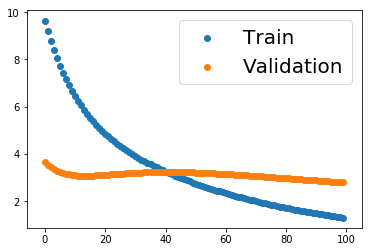

In [72]:
model=TSML.NeuralNet(nodes,X_train.shape[1],activations,act_ders,frob_cost,task="Regression")
model.train(X_train,y_train,100,.00001,X_val,y_val)

plt.scatter(range(len(model.error)),model.error, label="Train")
plt.scatter(range(len(model.valerror)),model.valerror, label="Validation")
plt.legend(fontsize=20)

print(model.error[-1], model.valerror[-1])

In [73]:
model.predict(X_test)
y_test_norm=(y_test-model.ymins)/(model.ymaxes-model.ymins)
frob_cost(y_test_norm,model.normpredictions)

1.2795823888646627